In [ ]:
# pepsi.evaluation.ipynb
# by: Tim Lucas Halt (MatrNr. 6682645)

# Vorbereitung
Zunächst werden die notwendigen Bibliotheken installiert und importiert. Möglicherweise ist ein Neustart des Kernels erforderlich.

In [ ]:
%pip install tensorflow
%pip install matplotlib
%pip install scipy
%pip install seaborn

import numpy as np
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
import seaborn as sn

Nun wird der MNIST Datensatz geladen und für das Training vorbereitet.

In [8]:
# Loading the MNIST dataset in one line
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train_normalized = x_train/255
x_test_normalized = x_test/255
x_train= x_train_normalized.reshape(-1, 28, 28, 1)
x_test = x_test_normalized.reshape(-1, 28, 28, 1)

# Printing the shape
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
y_train: (60000,)
x_test: (10000, 28, 28, 1)
y_test: (10000,)


# Definition und Training des Netzes
Um eine aussagekräftige Evaluation zu erhalten werden 20 Modelle erstellt, trainiert und die Ergebnisse ausgewertet. 

In [ ]:
nets = 20
model = [0] * nets

for j in range(nets):

    model[j] = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),

    tf.keras.layers.Conv2D(filters=28, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=28, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=28, kernel_size=5, strides=2, padding='same', activation='relu', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.GaussianNoise(0.75),

    tf.keras.layers.Conv2D(filters=56, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=56, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=56, kernel_size=5, strides=2, padding='same', activation='relu', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.GaussianNoise(0.75),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(82, kernel_regularizer = tf.keras.regularizers.l2(0.07), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.GaussianNoise(0.75),

    tf.keras.layers.Dense(54, kernel_regularizer = tf.keras.regularizers.l2(0.07), activation = 'sigmoid'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.GaussianNoise(0.75),

    tf.keras.layers.Dense(10, activation='softmax', use_bias=False)
    ])

model[0].summary()

Vor dem Trainingsbeginn werden die Hyperparameter für das Training definiert. Dies beinhaltet die Loss-Funktion, den Optimizer, die Callbacks und die Daten-Augmentierung.

In [15]:
# Define loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

sampleID = 100
loss_fn(y_train[:1], model[j](x_train[sampleID-1:sampleID]).numpy()).numpy()

model[j].compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                loss= loss_fn,
                metrics=['accuracy'])


# Define callbacks
vlr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.975 ** x)

er = tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=10,
        restore_best_weights=True
)

# Define augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                rotation_range=15,
                zoom_range = 0.15,
                shear_range=0.1,
                width_shift_range=0.1,
                height_shift_range=0.1,
                rescale=0,
                fill_mode = 'nearest',
                horizontal_flip=False,
                vertical_flip=False)
datagen.fit(x_train)

Ist das erledigt, kann das Training beginnen. Dabei werden für jeden Durchlauf die Ergebnisse des Tests gespeichert. Das Training dauert wegen der vielen großen Netzte sehr l a a a a a n g e... (Es lohnt sich diesen Block zu **überspringen** und auf die vorgefertigten Ergebnisse im nächsten Block zurückzugreifen.)

In [ ]:
accuracies = []

for j in range(nets):

    history = model[j].fit(
        datagen.flow(x_train, y_train, batch_size = 32),
        epochs=500, # due to earlystopping it ends before 100 epochs
        shuffle = True,
        validation_data=(x_test, y_test),
        callbacks=[vlr, er],
        verbose=1
    )

    (test_loss, test_acc) = model[j].evaluate(x_test, y_test)
    print("Loss: ", test_loss)
    print("Accuracy: ", test_acc)
    accuracies.append(test_acc)

# Auswertung
Für die Dokumentation wurde ohnehin eine Evaluation mit 40 Netzen durchgeführt. Diese Ergebnisse können hier geladen und das lange Training quasi übersprungen werden. 

In [5]:
accuracies = [0.9950, 0.9974, 0.9967, 0.9962, 0.9961, 0.9970, 0.9965, 0.9969, 0.9960, 0.9969,
             0.9963, 0.9953, 0.9965, 0.9961, 0.9959, 0.9961, 0.9967, 0.9964, 0.9967, 0.9953,
             0.9968, 0.9966, 0.9953, 0.9974, 0.9967, 0.9956, 0.9968, 0.9959, 0.9970, 0.9957,
             0.9969, 0.9955, 0.9967, 0.9958, 0.9964, 0.9965, 0.9966, 0.9957, 0.9967, 0.9967,
             0.9970, 0.9967, 0.9970, 0.9967, 0.9958, ]

"Ein Bild sagt mehr als tausend Zahlen" - Plotten wir uns die Ergebnisse in einem Histogramm und errechnen die durchschnittliche Genauigkeit, sowie die Standartabweichung.

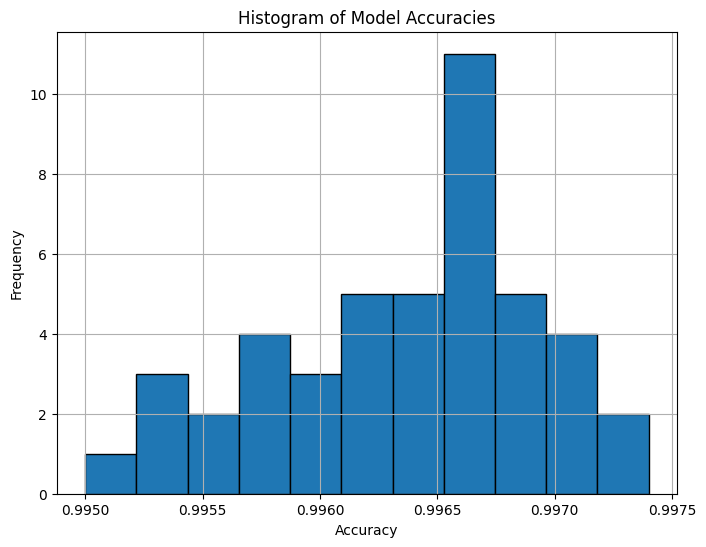

Mean Accuracy: 0.9964
Standard Deviation of Accuracy: 0.0006


In [9]:
# plot as histogramm
plt.figure(figsize=(8, 6))
plt.hist(accuracies, bins=11, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Model Accuracies')
plt.grid(True)
plt.show()

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.4f}')

# Das Benchmark-Modell
Für den Benchmark wurde das Training des obigen Netzes mit einem späteren EarlyStop durchgeführt. Das beste Modell kann im folgenden geladen und ausgewertet werden.

313/313 [==============================] - 3s 8ms/step - loss: 0.0202 - accuracy: 0.9977
Loss:  0.02015472948551178
Accuracy:  0.9976999759674072
313/313 [==============================] - 2s 7ms/step


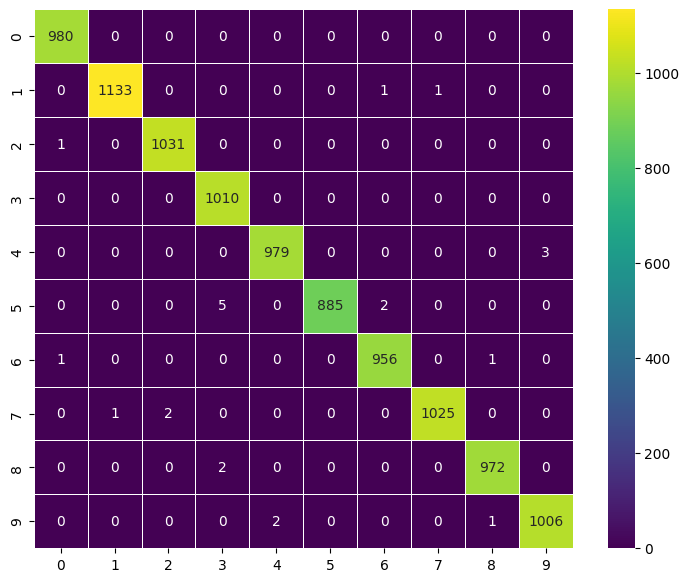

In [40]:
# load a saved pepsi configuration to evaluate
model_name = '../Code/model/pepsi.0.9977_benchmark.h5' 
pepsi_reloaded = tf.keras.models.load_model(model_name)

(test_loss, test_acc) = pepsi_reloaded.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

predictions = pepsi_reloaded.predict([x_test])
predictions = np.argmax(predictions, axis=1)

confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
plt.show()